In [20]:

# Importing libraries

# Math Libraries
import random
import math
import numpy as np

# Data Processing
import pandas as pd

# Libraries for data visualization
import matplotlib.pyplot as plt  
import seaborn as sns 

# ML
from sklearn.linear_model import LogisticRegression # Importing Logistic Model
from sklearn.model_selection import train_test_split # Train Test Split
from sklearn.preprocessing import MinMaxScaler # Data normalizer Min Max Scale
from sklearn.metrics import accuracy_score # Calculate the accuracy
from scipy.optimize import brentq, newton

# Loading Bar
from time import sleep
from tqdm import tqdm

# Supress warnings
import warnings; warnings.simplefilter('ignore')


# Lower Bounds

In [16]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

def lower_bound_categorical(k, n=1000, epsilon=0.01):
    """Compute the lower bound to Pe for the binary valued cost function case.

    BOP is a categorical variable.
    """
    d = 2 ** k
    m = n / d
    parenthesis_term = ( 1 + 4 * epsilon ** 2)**(m/2)
    frac_term = 1 / (2*np.sqrt(d))
    return 1 - frac_term * parenthesis_term

def lower_bound_normal(k, n=1000, epsilon=0.01, sigma=1):
    """Compute the lower bound to Pe for the real-valued cost function case.

    BOP is (approximated as) a normal variable.
    """
    d = 2 ** k
    m = n / d
    exp_term = np.exp( (m*epsilon**2) / (2 * sigma**2))
    frac_term = 1 / (2 * np.sqrt(d))
    return 1 - frac_term * exp_term

def lower_bound_laplacian(k, n=1000, epsilon=0.01, sigma=1):
    """Compute the lower bound to Pe for the real-valued cost function case.

    BOP is (approximated as) a Laplacian variable.
    """
    d = 2 ** k
    m = n / d
    exp_term = (np.exp((-m *(2**0.5)* -epsilon) / sigma) - 1)
    frac_term = 1 / 2
    return 1 - frac_term * exp_term

# Plots

In [18]:
k_values = np.arange(0, 21)

sigma_values = [0.01, 0.1, 0.5, 1, 10]
fontsize = 16

def plot_lower_bound_categorical(ax, n, color='red'):    
    lower_bound_values = lower_bound_categorical(k_values, n=n)
    ax.plot(k_values, lower_bound_values, label=f"Categorical Pe", color=color, linewidth=2, linestyle="-.")
    
    ax.axhline(y=0.5, c="black", linestyle="--", label="Pe = 0.5")
    ax.set_ylim((-0.01, 1.01))
    ax.set_xticks(np.arange(min(k_values), max(k_values) + 1, 5))
    ax.set_ylabel("Pe", fontsize=fontsize)
    ax.set_xlabel("Number of attributes k", fontsize=fontsize)
    ax.set_title(f"Probability of error Pe for n={n}", fontsize=fontsize)

def plot_lower_bound_normal(ax, n):
    # Choose a colormap, e.g., viridis, and normalize it
    colormap = plt.get_cmap('viridis', len(sigma_values))
    norm = plt.Normalize(min(np.log(sigma_values)), max(np.log(sigma_values)))
    
    for sigma in sigma_values: 
        lower_bound_values = lower_bound_normal(k_values, sigma=sigma, n=n)
        color = colormap(norm(np.log(sigma)))
        ax.plot(k_values, lower_bound_values, label=f"Real Valued Pe, sigma={sigma}", color=color, alpha=0.7)
    
    ax.axhline(y=0.5, c="black", linestyle="--")
    ax.set_ylim((-0.01, 1.01))
    ax.set_xticks(np.arange(min(k_values), max(k_values) + 1, 5))
    ax.set_ylabel("Pe", fontsize=fontsize)
    ax.set_xlabel("Number of attributes k", fontsize=fontsize)
    ax.set_title(f"Probability of error Pe for n={n}, epsilon = 0.01", fontsize=fontsize)

def plot_lower_bound_laplacian(ax, n):
    # Choose a colormap, e.g., viridis, and normalize it
    colormap = plt.get_cmap('viridis', len(sigma_values))
    norm = plt.Normalize(min(np.log(sigma_values)), max(np.log(sigma_values)))
    
    for sigma in sigma_values: 
        lower_bound_values = lower_bound_laplacian(k_values, sigma=sigma, n=n)
        color = colormap(norm(np.log(sigma)))
        ax.plot(k_values, lower_bound_values, label=f"Real Valued Pe, sigma={sigma}", color=color, alpha=0.7)
    
    ax.axhline(y=0.5, c="black", linestyle="--")
    ax.set_ylim((-0.01, 1.01))
    ax.set_xticks(np.arange(min(k_values), max(k_values) + 1, 5))
    ax.set_ylabel("Pe", fontsize=fontsize)
    ax.set_xlabel("Number of attributes k", fontsize=fontsize)
    ax.set_title(f"Probability of error Pe for n={n}, epsilon = 0.01", fontsize=fontsize)



## Plot for lower bound categorical variable

/tmp/ipykernel_836717/3553924948.py:23: RuntimeWarning: overflow encountered in exp
  exp_term = np.exp( (m*epsilon**2) / (2 * sigma**2))


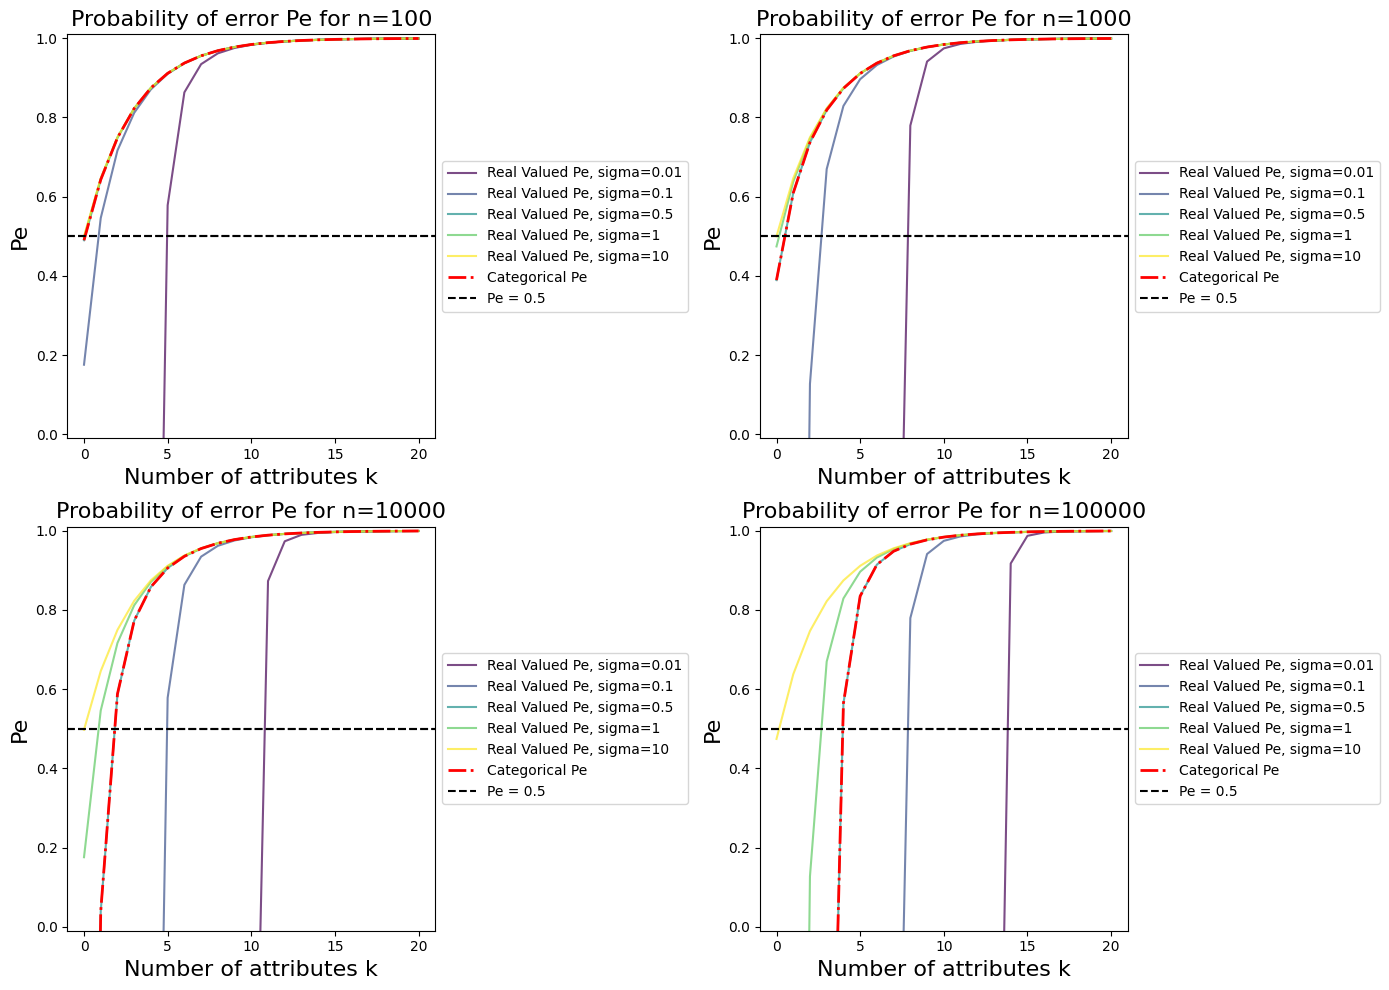

In [14]:
# Create the figure and axes for subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))  # Adjusted figsize for more room

# Plot for different values of n on separate subplots
n_values = [100, 1000, 10**4, 10**5]
for i in range(2):
    for j in range(2):
        n = n_values[2 * i + j]
        ax = axes[i, j]
        
        # Plot the normal lower bounds first
        plot_lower_bound_normal(ax, n)
        
        # Plot the categorical lower bounds last, so they are on top
        plot_lower_bound_categorical(ax, n, color='red')
        
        # Add legend to each subplot on the right side
        ax.legend(fontsize=10, loc='center left', bbox_to_anchor=(1, 0.5))

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

[-1.31064369e+61 -2.55992548e+30 -1.13135438e+15 -2.37839677e+07
 -3.44697569e+03 -4.00239431e+01 -3.05653065e+00 -9.39236876e-03
  6.31267484e-01  8.40935316e-01  9.25950924e-01  9.64253289e-01
  9.82435168e-01  9.91293389e-01  9.95665483e-01  9.97837418e-01
  9.98919876e-01  9.99460229e-01  9.99730187e-01  9.99865112e-01
  9.99932560e-01]
[-6.93139308e+05 -5.87202305e+02 -1.56566650e+01 -1.42887905e+00
  2.89859709e-01  7.22137451e-01  8.76356452e-01  9.41589959e-01
  9.71601457e-01  9.85996818e-01  9.93046756e-01  9.96535382e-01
  9.98270681e-01  9.99136087e-01  9.99568230e-01  9.99784162e-01
  9.99892092e-01  9.99946049e-01  9.99973025e-01  9.99986513e-01
  9.99993256e-01]
[-6.95941434 -0.55662519  0.48594251  0.78794049  0.90331771  0.95379386
  0.97740736  0.98882848  0.9944451   0.99723022  0.99861702  0.99930899
  0.99965461  0.99982734  0.99991368  0.99995684  0.99997842  0.99998921
  0.99999461  0.9999973   0.99999865]
[-0.55662519  0.48594251  0.78794049  0.90331771  0.95379

/tmp/ipykernel_836717/4206884024.py:34: RuntimeWarning: overflow encountered in exp
  exp_term = (np.exp((-m *(2**0.5)* -epsilon) / sigma) - 1)


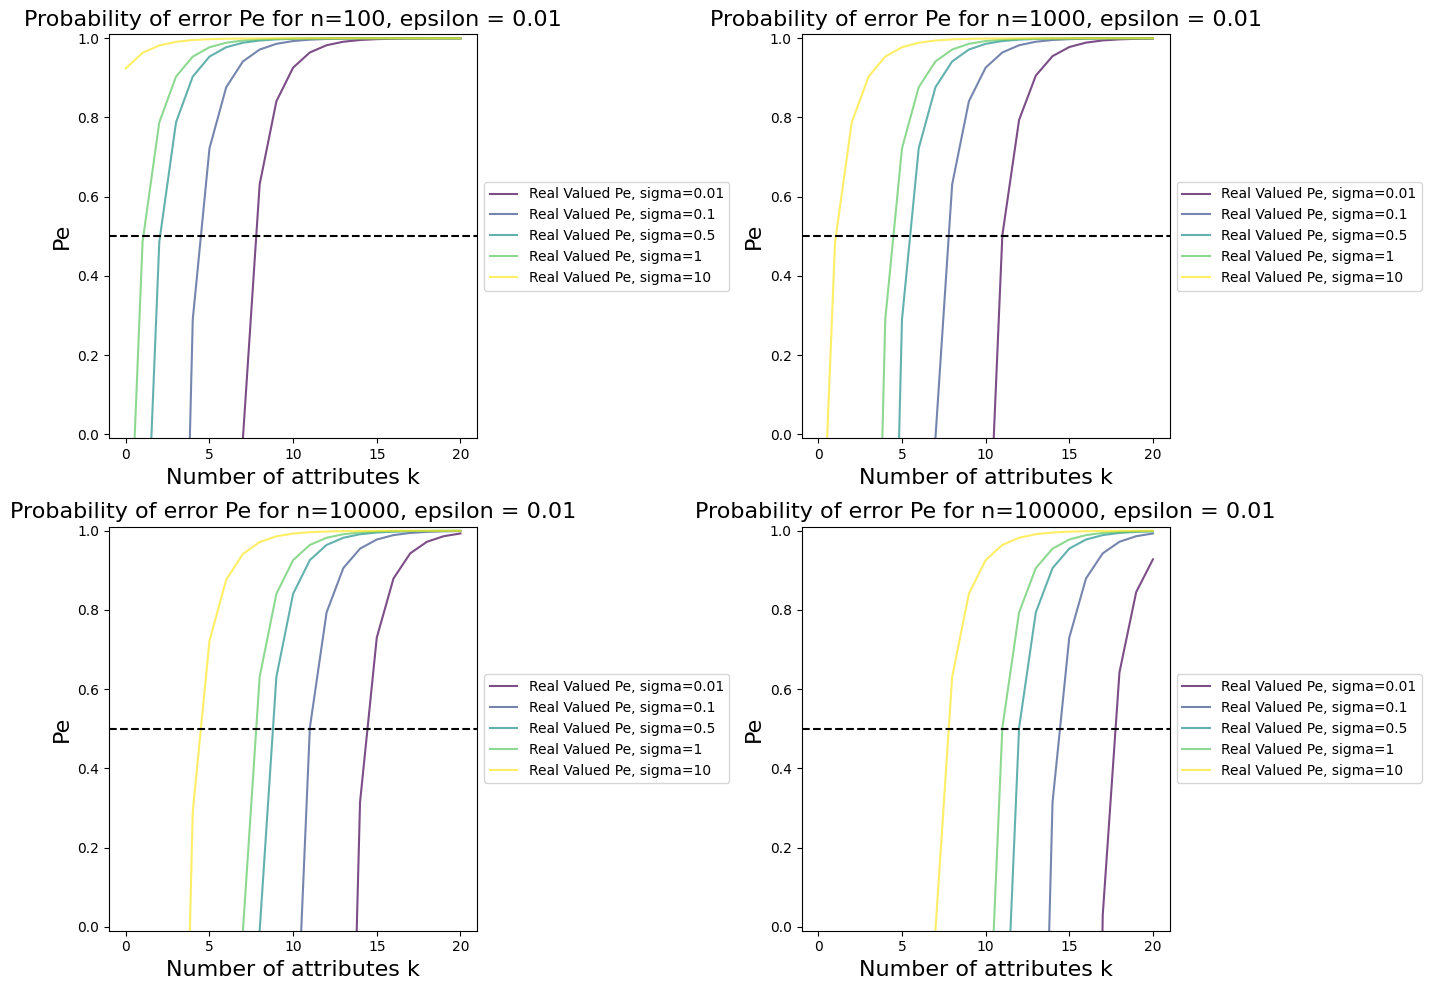

In [17]:
# Create the figure and axes for subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))  # Adjusted figsize for more room

# Plot for different values of n on separate subplots
n_values = [100, 1000, 10**4, 10**5]
for i in range(2):
    for j in range(2):
        n = n_values[2 * i + j]
        ax = axes[i, j]
        
        # Plot the normal lower bounds first
        plot_lower_bound_laplacian(ax, n)
        
        # Add legend to each subplot on the right side
        ax.legend(fontsize=10, loc='center left', bbox_to_anchor=(1, 0.5))

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

## Plot for lower bound normal variable

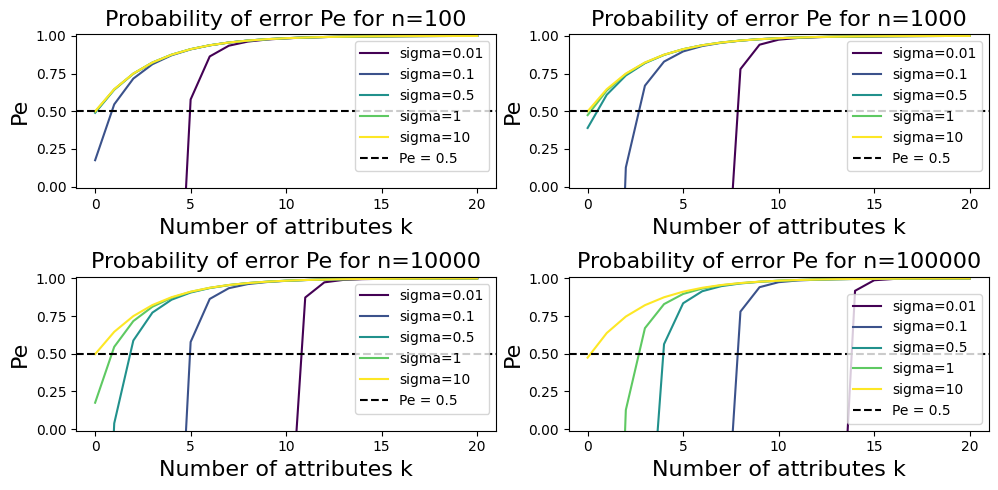

In [5]:
# Create the figure and axes for subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))

# Plot for n=100, n=1000, and n=10000 on separate subplots
n_values = [100, 1000, 10 ** 4, 10 ** 5, 10 ** 6, 10 ** 7]
for i in range(2):
    for j in range(2):
        n = n_values[2*i + j]
        plot_lower_bound_normal(axes[i, j], n)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

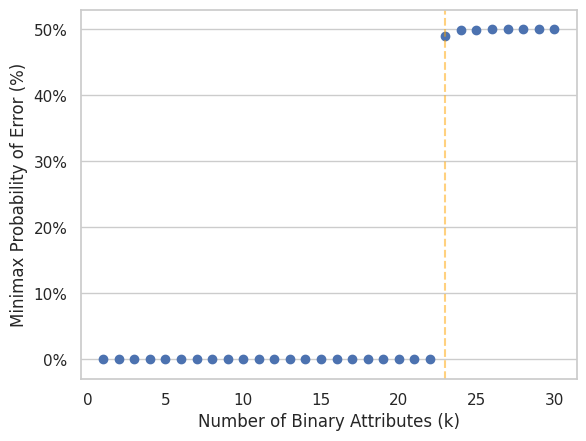

In [21]:

N = 8 * 10**(9)
k = (1 + np.arange(30))
d = 2** k
m = N / d
eps = 0.01
sig = 0.1
bound = 50 * np.maximum(1 - (1 / (2*np.sqrt(d)))* np.exp((m*eps**2)/(2*sig**2)), 0)

import matplotlib.ticker as mtick
sns.set()
with sns.axes_style("whitegrid"):
  fig = plt.figure()

  a = fig.add_subplot(1,1,1)
  a.scatter(k, bound)#, linestyles='', marker='o', edgecolor = 'black', linewidth = 1)
  plt.xlabel('Number of Binary Attributes (k)')
  plt.ylabel('Minimax Probability of Error (%)')
  fmt = '%.0f%%'
  xticks = mtick.FormatStrFormatter(fmt)
  a.yaxis.set_major_formatter(xticks)
  a.grid(axis='x')
  plt.axvline(23, 0,50, color = 'orange', linestyle='--', alpha=0.5, label = 'm = Number of groups')
  plt.ylim([-3, 53])   